### CUSTOMER CHURN EM EMPRESAS DE SEGUROS DE AUTOMÓVEL - 03/2020
### MARCIO DE LIMA

Trabalho de Conclusão de Curso para a obtenção do tı́tulo de Especialista em Big Data, Data Science e
Data Analytics, pelo curso de Pós-Graduação Lato Sensu em Big data, Data science e Data Analytics da
Universidade do Vale do Rio dos Sinos – UNISINOS.
Orientadora: Prof. Dra. Josiane B. Porto


## Dicionário de Dados

## Importação

In [144]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#!pip install lightgbm
from lightgbm import LGBMClassifier

#!pip install xgboost
from xgboost import XGBClassifier

#!pip install joblib
from sklearn.externals import joblib




In [42]:
#Carregando o dataset
df = pd.read_csv('dados/dataset_original.csv', sep=",")
df.head(10)

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,numeroSegmentoCliente,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,...,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,renovou,gerouSinistro
0,11,2,1,1,1,1,10,5,8,1,...,2152.436533,1,2,3,2,1,-288.523467,1,0,0
1,11,2,1,1,0,1,10,5,8,1,...,2152.436533,1,3,2,3,3,386.676533,3,0,0
2,11,2,1,1,0,1,10,5,8,1,...,2152.436533,1,3,2,3,3,386.676533,3,0,0
3,12,2,0,1,0,1,10,5,8,1,...,2131.880000,1,3,3,1,3,59.540000,2,0,0
4,5,2,1,1,0,1,11,2,2,1,...,1495.110000,0,3,2,3,2,45.400000,2,0,0
5,3,1,0,1,0,1,30,0,8,1,...,1328.220000,0,2,2,2,2,-42.150000,2,0,0
6,1,1,1,1,0,1,14,3,8,1,...,2152.436533,0,3,2,2,1,561.556533,3,0,0
7,1,2,1,1,0,1,30,0,8,1,...,2152.436533,0,2,1,1,2,1092.336533,3,0,0
8,1,2,1,1,0,1,10,4,8,1,...,2152.436533,0,2,2,1,2,574.456533,3,0,0
9,2,2,0,1,0,1,22,5,8,1,...,8150.710000,0,2,3,3,3,4546.420000,3,0,0


# Análise Exploratória dos Dados

In [3]:
# Mostrando os dados
df.shape

(74580, 48)

In [13]:
# Mostrando as estruturas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74580 entries, 0 to 74579
Data columns (total 48 columns):
anosFidelidadeCliente          74580 non-null int64
codigoEstadoCivil              74580 non-null int64
sexoSegurado                   74580 non-null int64
tipoPessoaSegurado             74580 non-null int64
resgatePontos                  74580 non-null int64
numeroSegmentoCliente          74580 non-null int64
codigoCategoriaTarifaria       74580 non-null int64
quantidadePortasVeiculo        74580 non-null int64
codigoCombustivelVeiculo       74580 non-null int64
codigoUsoVeiculo               74580 non-null int64
codigoFamiliaVeiculo           74580 non-null int64
especieVeiculo                 74580 non-null int64
codigoTipoVeiculo              74580 non-null int64
codigoMarcaVeiculo             74580 non-null int64
numeroSegmentoDocumento        74580 non-null int64
codigoSucursal                 74580 non-null int64
premioLiquidoPagoApolice       74580 non-null float64
valor

In [14]:
# Dados Estatisticos - Analise descritiva das colunas Numéricas
# Arquivo com 48 colunas, todas numéricas, total de Registros: 74.580 linhas
# Variavel Target (renovou) possue 0 e 1, olhando a média já vemos que o dataset está balanceado. Veremos mais abaixo isso. 
# Possíveis outlier na coluna valorPremioPagoAtual e diferencaPremioAntNovo. 
# Desvio padrão quase o mesmo para todas as colunas. 

df.describe()

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,numeroSegmentoCliente,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,...,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,renovou,gerouSinistro
count,74580.000000,74580.000000,74580.000000,74580.000000,74580.000000,74580.0,74580.000000,74580.000000,74580.000000,74580.000000,...,74580.000000,74580.000000,74580.000000,74580.000000,74580.000000,74580.000000,74580.000000,74580.000000,74580.000000,74580.000000
mean,5.274819,1.940520,0.418075,0.981818,0.269040,1.0,14.746259,4.042411,6.624350,1.063529,...,2260.613982,0.448968,2.276468,2.117605,2.111183,2.159909,163.594338,2.175248,0.500000,0.036980
std,5.062727,0.869995,0.493246,0.133609,0.443464,0.0,7.702183,1.559439,2.482494,1.137540,...,2627.477465,0.497392,0.470228,0.766173,0.770820,0.780439,2361.405014,0.819449,0.500003,0.188715
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000,0.000000,1.000000,1.000000,...,279.270000,0.000000,1.000000,1.000000,1.000000,1.000000,-32548.331070,1.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,0.000000,1.0,10.000000,4.000000,8.000000,1.000000,...,1467.350000,0.000000,2.000000,2.000000,2.000000,2.000000,-135.377500,1.000000,0.000000,0.000000
50%,4.000000,2.000000,0.000000,1.000000,0.000000,1.0,10.000000,5.000000,8.000000,1.000000,...,2104.380000,0.000000,2.000000,2.000000,2.000000,2.000000,49.045000,2.000000,0.500000,0.000000
75%,7.000000,2.000000,1.000000,1.000000,1.000000,1.0,22.000000,5.000000,8.000000,1.000000,...,2314.997500,1.000000,3.000000,3.000000,3.000000,3.000000,424.688485,3.000000,1.000000,0.000000
max,24.000000,6.000000,1.000000,1.000000,1.000000,1.0,98.000000,5.000000,11.000000,30.000000,...,106166.360000,1.000000,3.000000,3.000000,3.000000,3.000000,97820.780000,3.000000,1.000000,1.000000


In [15]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [16]:
#Checando valores Null nos dados
df.isnull().any()[lambda x: x]

Series([], dtype: bool)

### Comentário: Dados sem valores NA e sem valores NULL

In [17]:
# Distribuição da varíavel TARGET 
df.groupby('renovou').size()

renovou
0    37290
1    37290
dtype: int64

### Comentário: Balanceamento da variável Target OK. 50% dos dados  (37.290 clientes) que renovaram e 50% de dados (37.290 clientes) que renovaram. 


## Gráficos

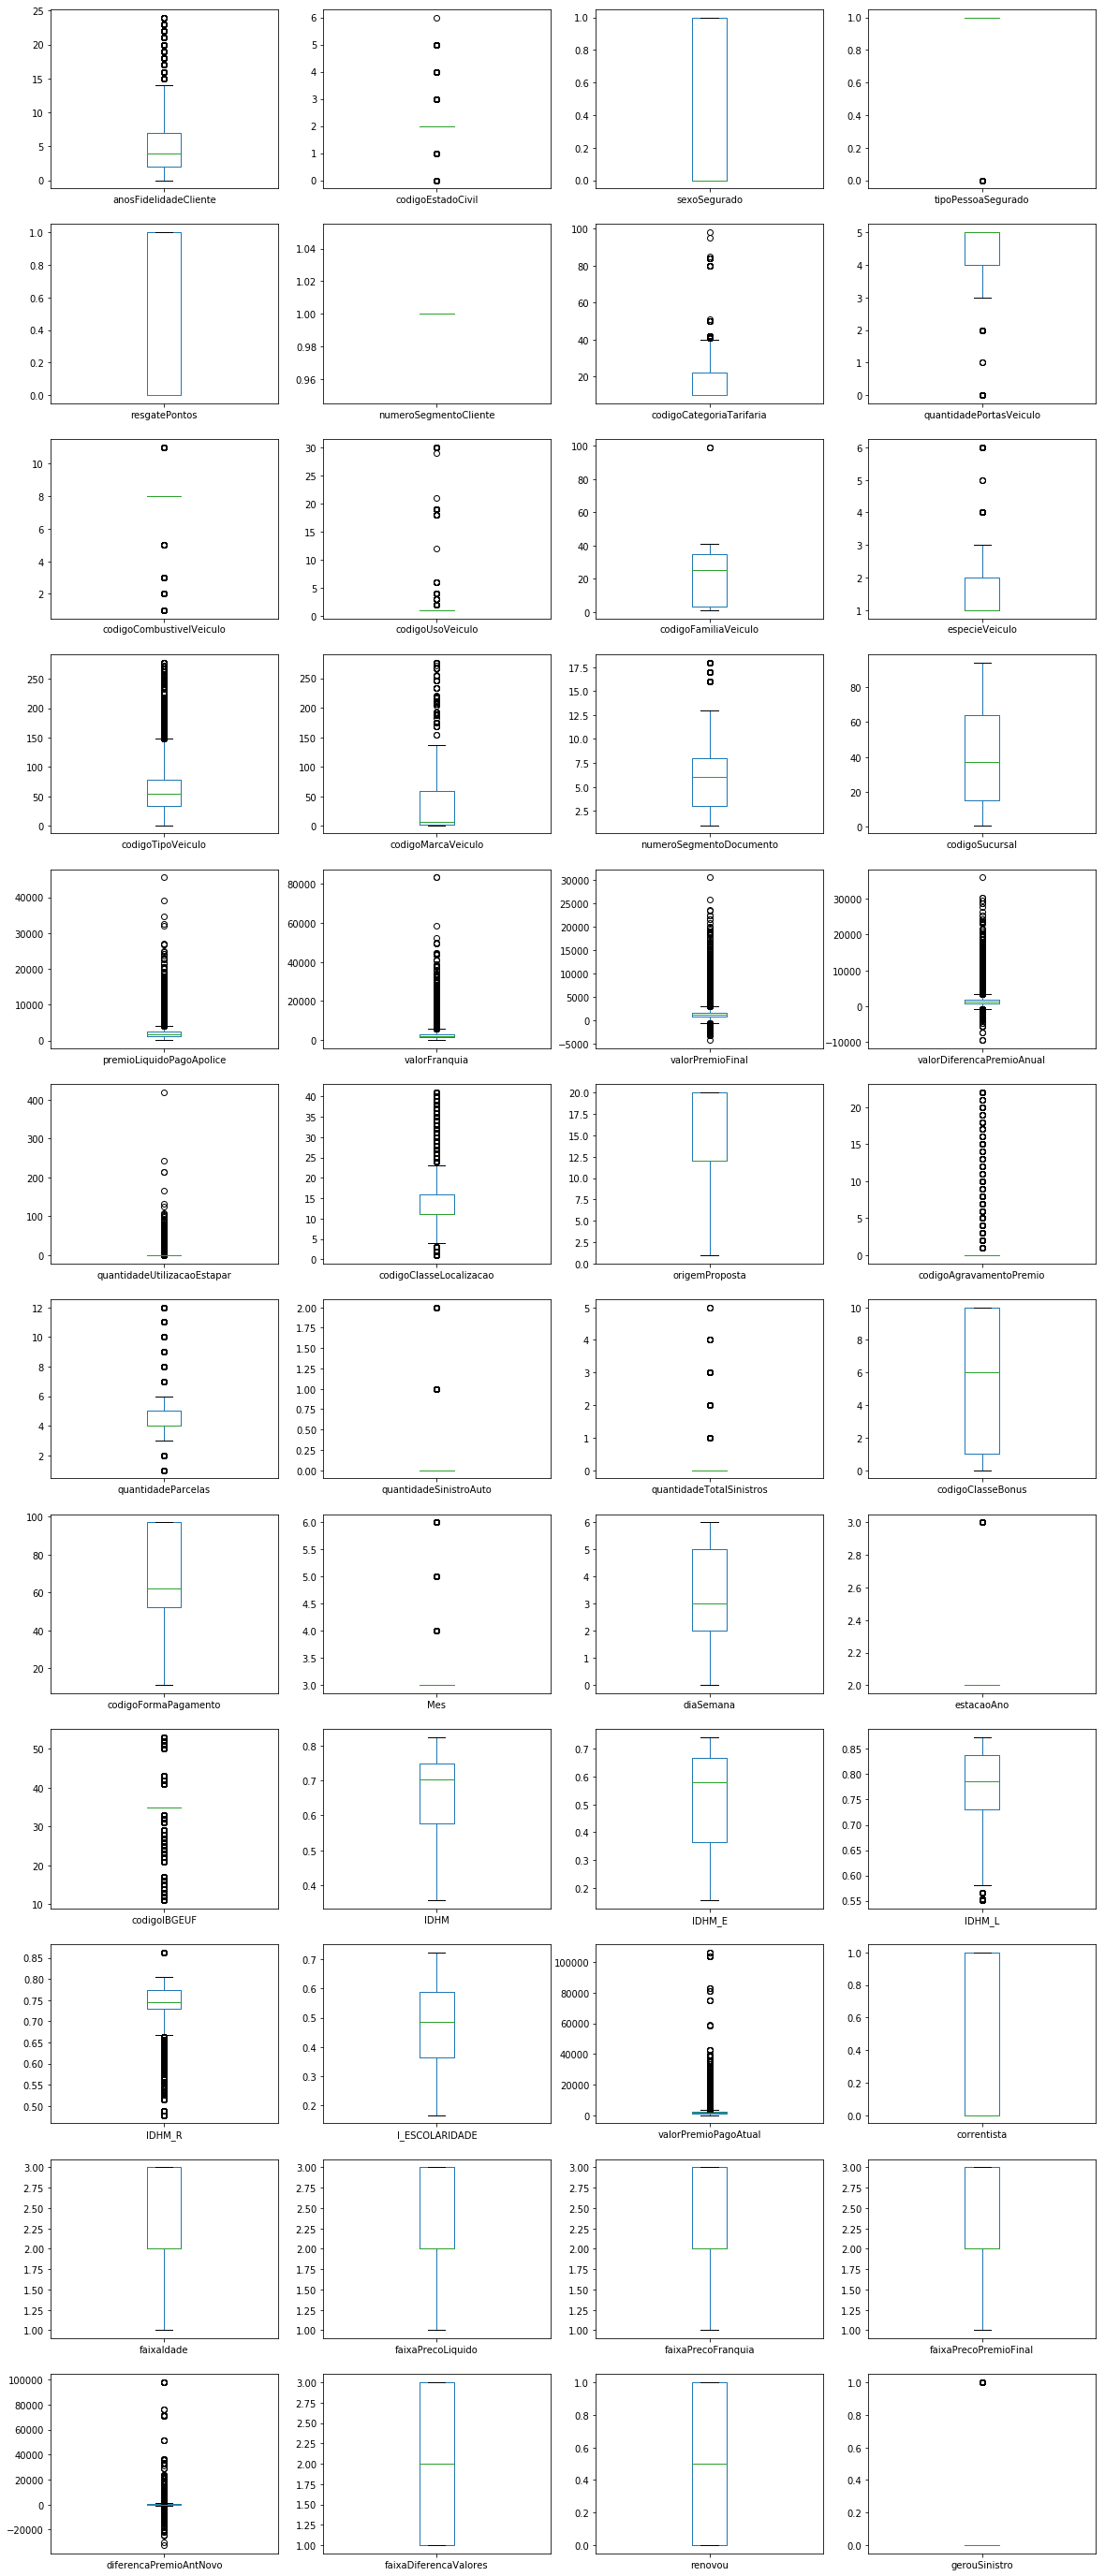

In [20]:
#Box-Plots
df.plot(kind = 'box', subplots = True, layout = (12,4), sharex = False, sharey = False, figsize=(20,50))
plt.show()

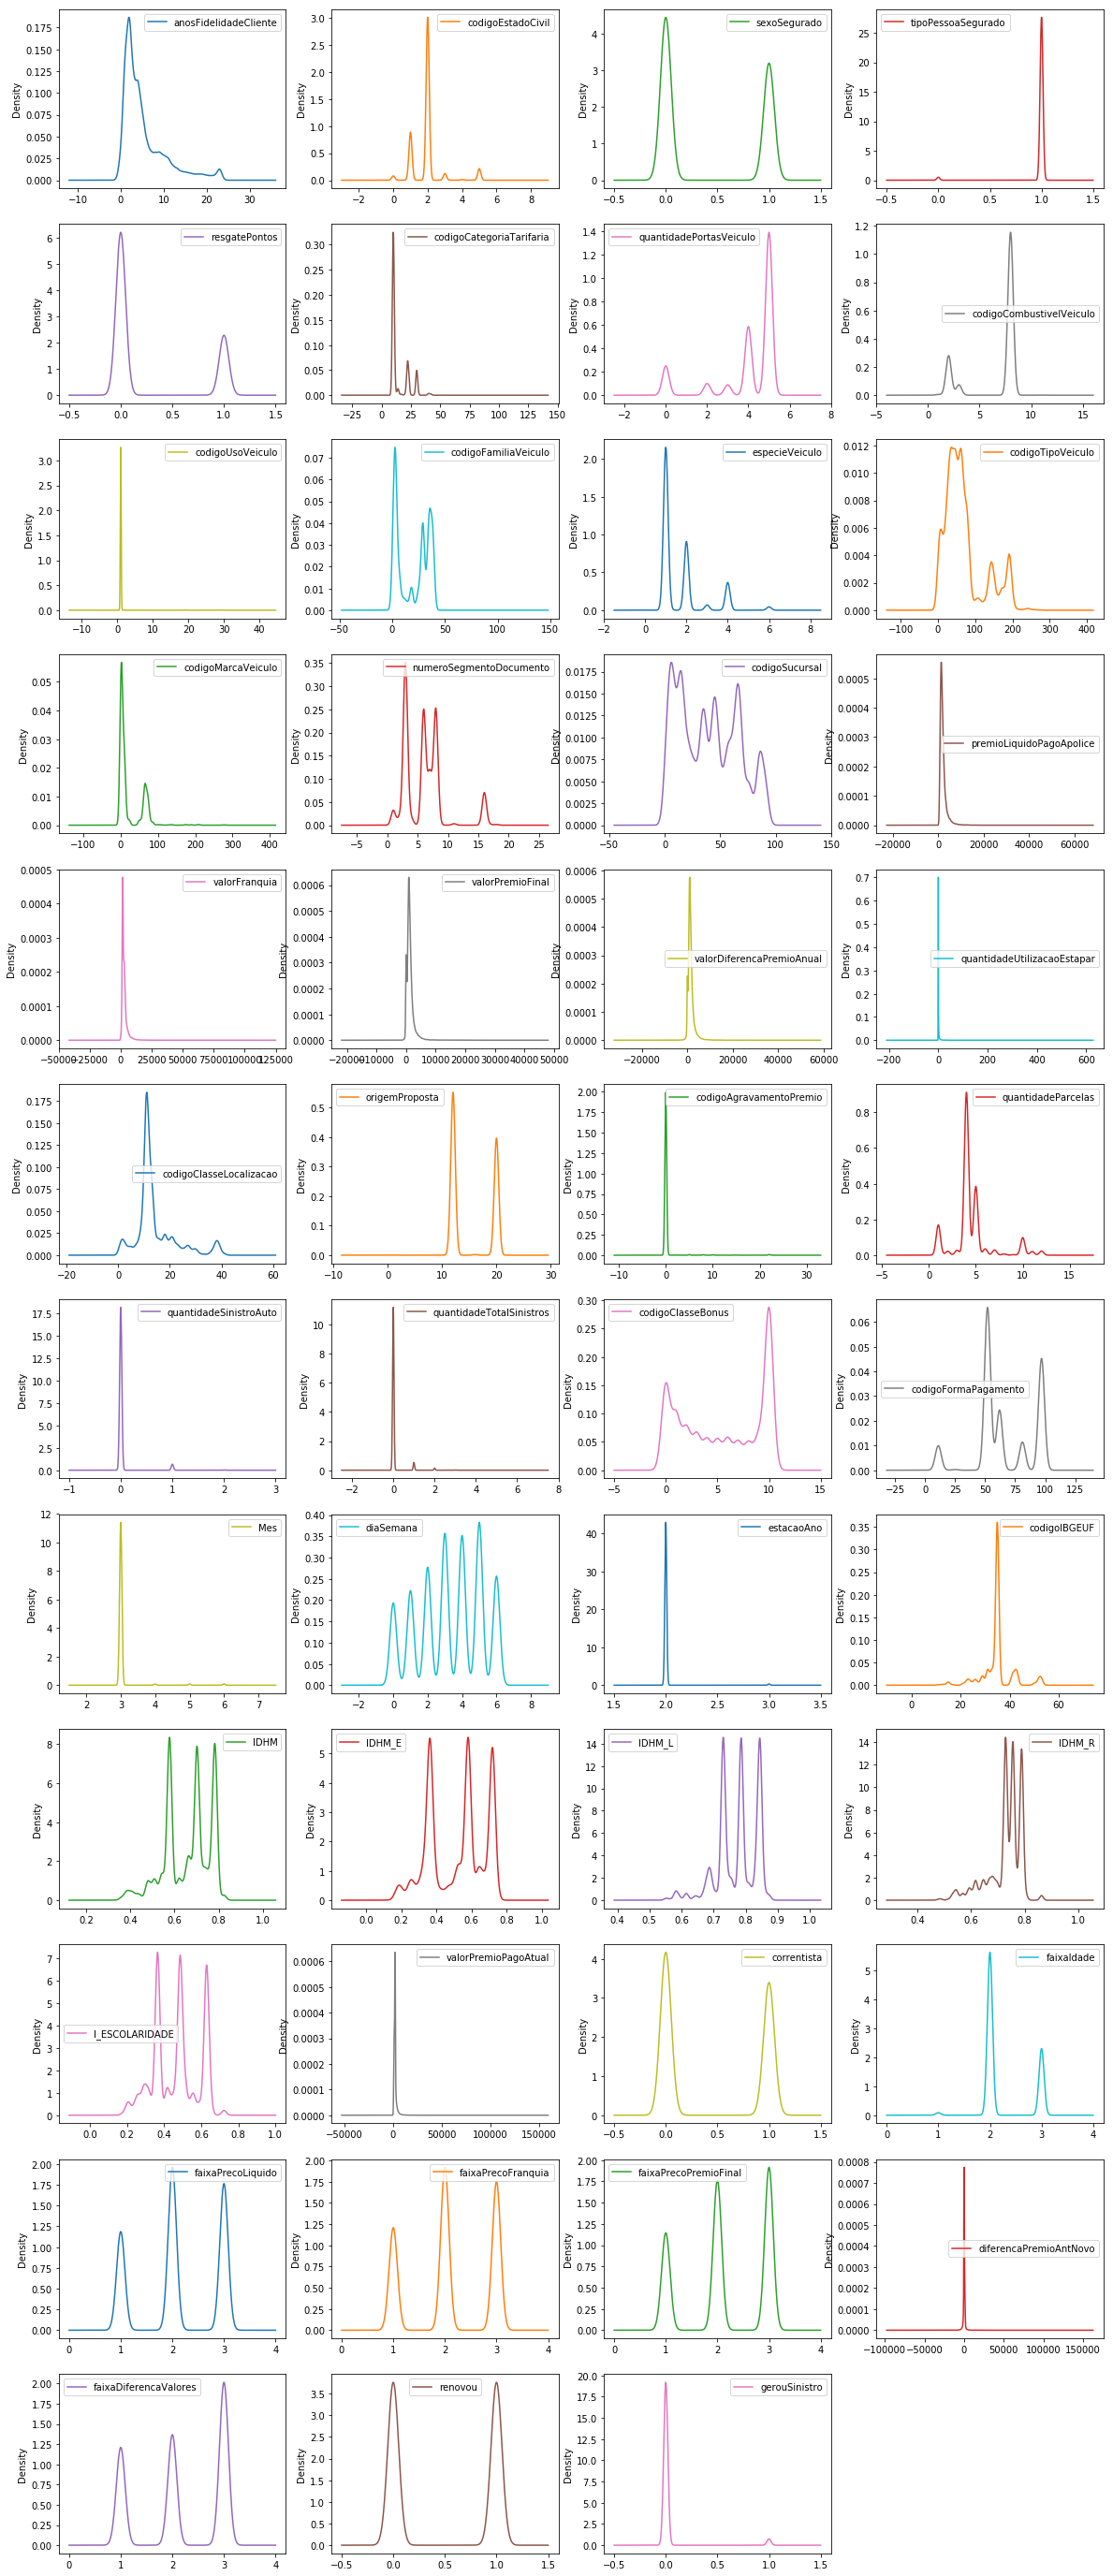

In [22]:
#Gráfico de Densidade - Retirado do gráfico a coluna - numeroSegmentoCliente
df.drop("numeroSegmentoCliente", axis=1).plot(kind = 'density', subplots = True, layout = (12,4), sharex = False, figsize=(20,50))
plt.show()

### Comentários: Analisando os gráficos acima podemos observar os seguintes pontos: 

1) numeroSegmentoCliente => 100% com valor 1, desta forma, sua importância para o modelo preditivo é baixa. Será retirado do dataset; O mesmo acontece com a coluna tipoPessoaSegurado e estacaoAno. 

2) Possível OutLiers nas variáveis valorPremioPagoAtual e diferencaPremioAntNovo;

3) Visualmente, algumas colunas possuem valores muito acima e abaixo da média, mas não são outliers pois seus valores condizem com o negócio. Vide dicionários de dados;

4) Grande parte das variáveis são categóricas (qualitativas), estão representadas por números devido a anonimação dos dados. Vide dicionários de dados;

5) Os dados estão em uma distribuição normal.



In [23]:
#Dados de Correlação entre as variáveis, multiplicado por 100 para melhorar a visualização. 
df.corr(method = 'pearson')*100

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,codigoFamiliaVeiculo,...,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,renovou,gerouSinistro
anosFidelidadeCliente,100.000000,5.011194,2.677320,-0.571577,5.029120,-9.119080,11.121691,-2.528976,-1.505943,3.749211,...,2.413417,17.832599,22.029567,4.482603,1.982609,3.815253,1.066404,-7.605285,26.477345,-0.794276
codigoEstadoCivil,5.011194,100.000000,10.363196,30.353421,2.187650,-9.539217,5.094934,3.675125,-1.936371,0.001972,...,-4.851836,4.442239,8.123289,-5.112064,-4.616356,6.505767,0.359272,0.247139,3.911610,-0.252807
sexoSegurado,2.677320,10.363196,100.000000,11.534435,2.355976,-15.992385,18.949878,13.564071,-2.088257,-3.933374,...,-4.368938,4.570112,-9.205143,-1.440277,-3.906423,-2.295294,-0.743694,0.785447,2.544444,1.713482
tipoPessoaSegurado,-0.571577,30.353421,11.534435,100.000000,8.188015,-18.800567,5.499140,13.532998,-1.172077,0.296304,...,-14.520044,12.283497,-20.938954,-11.690708,-7.957979,-6.637353,-0.026322,3.436913,3.111037,0.911778
resgatePontos,5.029120,2.187650,2.355976,8.188015,100.000000,-4.446460,3.067403,3.961359,2.190978,-1.221787,...,1.032141,60.846732,-9.788742,6.911090,5.845128,4.577141,-0.054060,1.234785,-0.420279,0.768864
codigoCategoriaTarifaria,-9.119080,-9.539217,-15.992385,-18.800567,-4.446460,100.000000,-65.353999,-46.031990,1.064882,11.347609,...,13.541202,-8.084257,-9.768692,5.280218,10.552767,1.709147,3.069931,-2.630843,-6.410237,-3.677227
quantidadePortasVeiculo,11.121691,5.094934,18.949878,5.499140,3.067403,-65.353999,100.000000,29.445803,0.824700,0.343099,...,3.717120,7.455678,11.268487,26.306588,19.005942,12.640411,-5.347928,-10.033587,7.579395,3.116624
codigoCombustivelVeiculo,-2.528976,3.675125,13.564071,13.532998,3.961359,-46.031990,29.445803,100.000000,-0.150123,-12.180361,...,-15.244243,5.162743,-2.568910,-11.620075,-19.387504,-7.993521,0.439467,5.969608,-1.377312,3.843960
codigoUsoVeiculo,-1.505943,-1.936371,-2.088257,-1.172077,2.190978,1.064882,0.824700,-0.150123,100.000000,0.137114,...,1.701919,1.419037,-1.305774,4.105855,2.737598,-0.016082,-0.615333,-1.251920,-1.692655,-0.376099
codigoFamiliaVeiculo,3.749211,0.001972,-3.933374,0.296304,-1.221787,11.347609,0.343099,-12.180361,0.137114,100.000000,...,5.596569,-0.949351,-2.830813,16.580719,18.064942,8.384033,-1.149469,-5.615592,2.039623,-1.106300


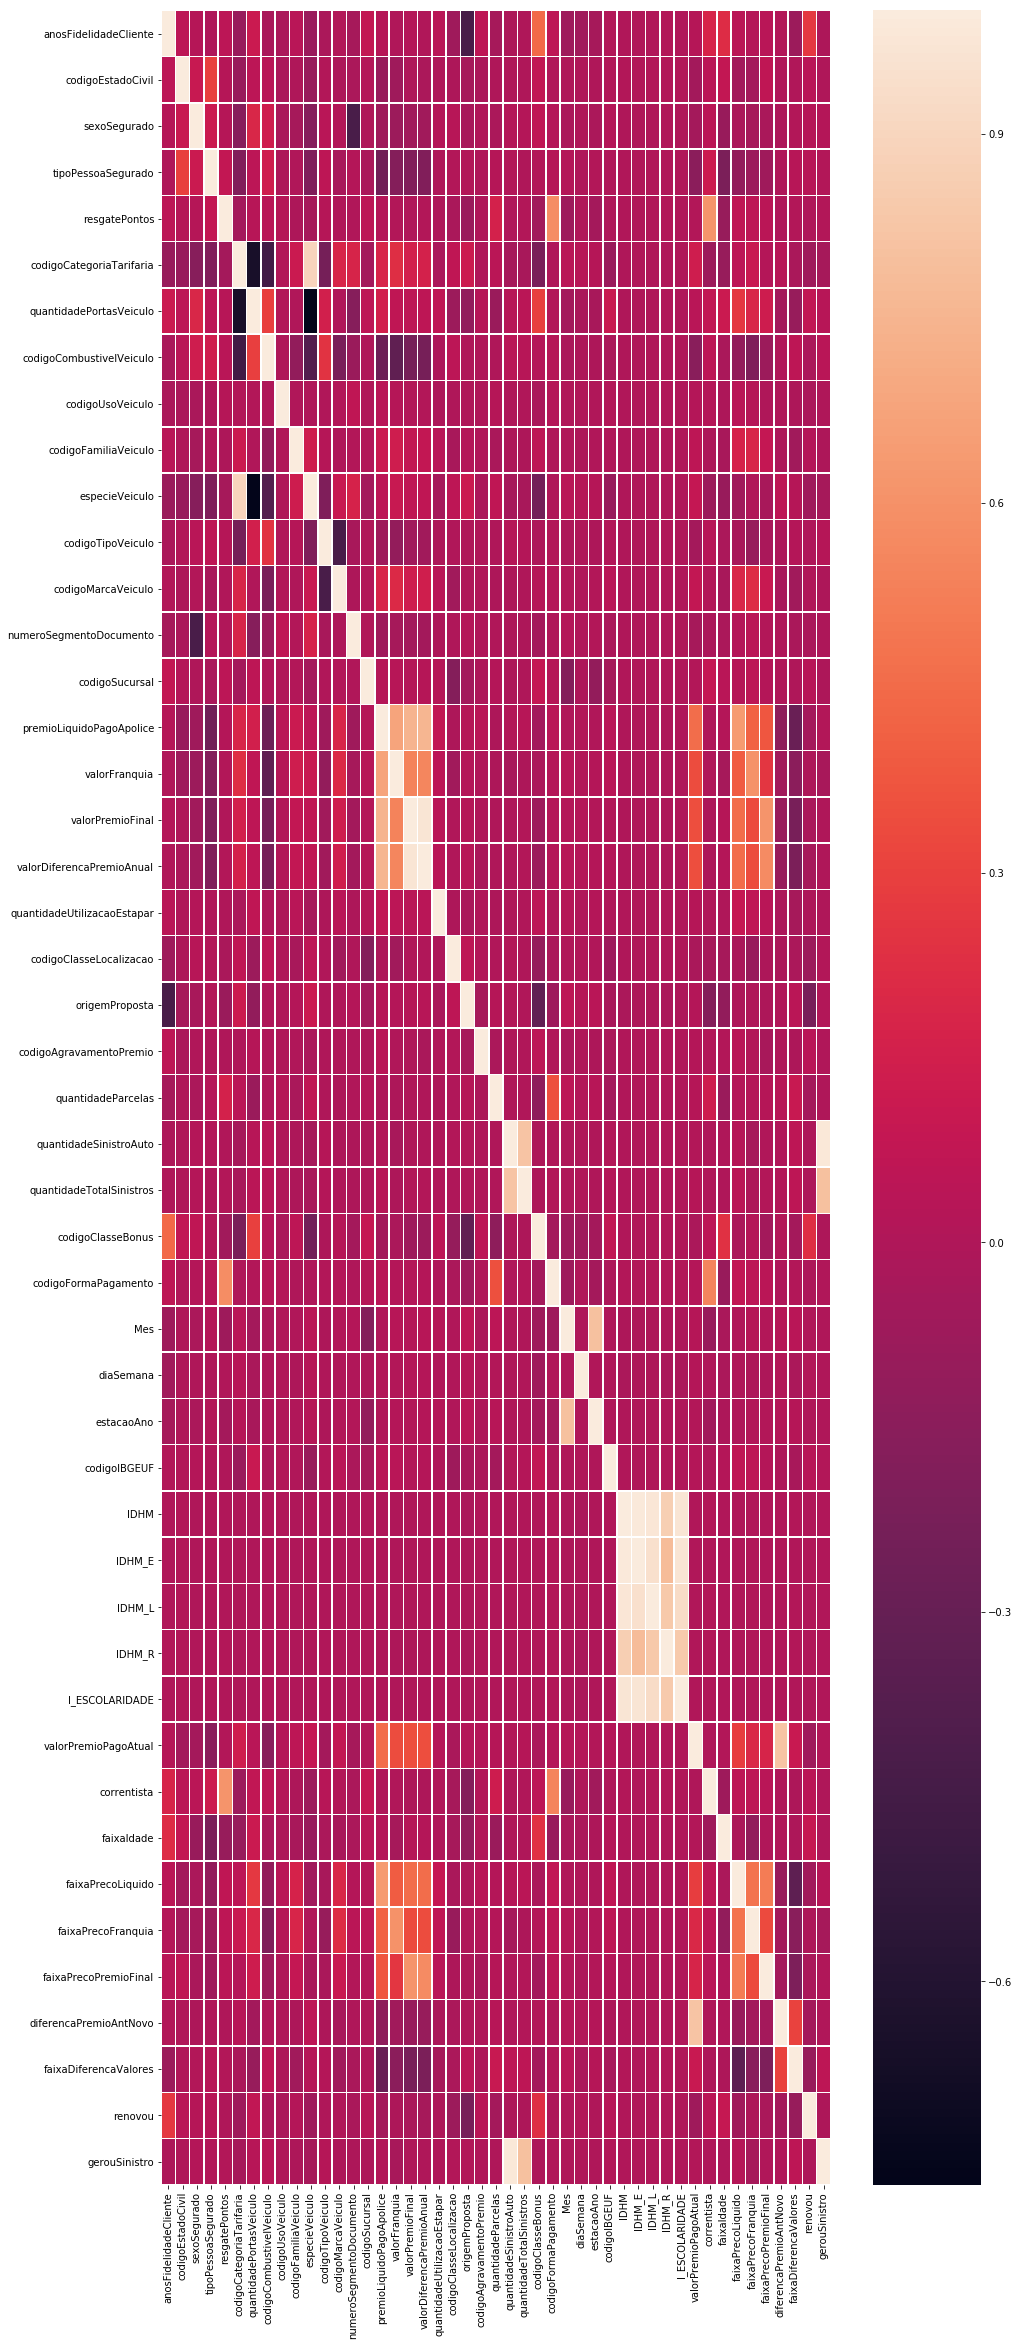

In [24]:
# Correlação em gráfico de HeatMap
f, ax = plt.subplots(figsize=(15, 40))
sns.heatmap(df.corr(method = 'pearson'),linewidths=.5, ax=ax)

In [25]:
# Correlação com a variável Target ordenado, feita a multiplicacao por 100 para melhor visualização
df.drop("renovou", axis=1).apply(lambda x: x.corr(df.renovou) * 100).sort_values()

origemProposta                -22.397682
faixaDiferencaValores         -10.144963
codigoClasseLocalizacao        -7.562305
valorPremioPagoAtual           -6.784300
especieVeiculo                 -6.422732
codigoCategoriaTarifaria       -6.410237
faixaPrecoLiquido              -5.727954
diferencaPremioAntNovo         -4.790138
premioLiquidoPagoApolice       -4.284138
quantidadeParcelas             -4.272563
valorDiferencaPremioAnual      -3.809193
faixaPrecoPremioFinal          -2.295346
numeroSegmentoDocumento        -2.245963
valorPremioFinal               -2.221081
codigoUsoVeiculo               -1.692655
codigoCombustivelVeiculo       -1.377312
faixaPrecoFranquia             -1.040229
quantidadeSinistroAuto         -0.964809
codigoFormaPagamento           -0.855628
gerouSinistro                  -0.824199
quantidadeTotalSinistros       -0.810351
valorFranquia                  -0.762092
quantidadeUtilizacaoEstapar    -0.692390
resgatePontos                  -0.420279
estacaoAno      

### Comentários: Pela análise de correlação, temos como principais fatores que influenciam no Churn as variáveis com valores maiores que 4 (positivo e negativo) abaixo: 

anosFidelidadeCliente, codigoClasseBonus, faixaIdade, quantidadePortasVeiculo, correntista, origemProposta,  faixaDiferencaValores, codigoClasseLocalizacao, valorPremioPagoAtual, especieVeiculo, codigoCategoriaTarifaria, faixaPrecoLiquido, diferencaPremioAntNovo e premioLiquidoPagoApolice

### Iremos utilizar a técnica de Features Selection para selecionar as melhores features para o Churn, pois é um método mais moderno e efetivo. 

In [31]:
# Tratamento de identificação de colunas com alta colinearidade. 
# Se a correlação de duas variáveis é maior de 0.90, é um indicativo de correlação forte entre elas. 
# Isso é um índicio de problema para o modelo preditivo. 
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Achando os indexes das colunas com correlação maior que 0.90
resultado = [column for column in upper.columns if any(upper[column] > 0.90)]
resultado

['valorDiferencaPremioAnual',
 'IDHM_E',
 'IDHM_L',
 'I_ESCOLARIDADE',
 'gerouSinistro']

### Comentário: As variáveis 'valorDiferencaPremioAnual', 'IDHM_E', 'IDHM_L', 'I_ESCOLARIDADE' e 'gerouSinistro' apresentam alta colinearidade (Acima de 90%). Desta forma, serão descartadas na construção do modelo preditivo. 

# Criando o modelo Preditivo

In [43]:
# Retirando as variaveis problemáticas e com alta colinearidade através das análises acima. 
# Total de 8 colunas
df = df.drop(['valorDiferencaPremioAnual',
 'IDHM_E',
 'IDHM_L',
 'I_ESCOLARIDADE',
 'gerouSinistro',
'numeroSegmentoCliente',
'tipoPessoaSegurado',
'estacaoAno'], axis=1)

df.shape


(74580, 40)

In [44]:
df.columns

Index(['anosFidelidadeCliente', 'codigoEstadoCivil', 'sexoSegurado',
       'resgatePontos', 'codigoCategoriaTarifaria', 'quantidadePortasVeiculo',
       'codigoCombustivelVeiculo', 'codigoUsoVeiculo', 'codigoFamiliaVeiculo',
       'especieVeiculo', 'codigoTipoVeiculo', 'codigoMarcaVeiculo',
       'numeroSegmentoDocumento', 'codigoSucursal', 'premioLiquidoPagoApolice',
       'valorFranquia', 'valorPremioFinal', 'quantidadeUtilizacaoEstapar',
       'codigoClasseLocalizacao', 'origemProposta', 'codigoAgravamentoPremio',
       'quantidadeParcelas', 'quantidadeSinistroAuto',
       'quantidadeTotalSinistros', 'codigoClasseBonus', 'codigoFormaPagamento',
       'Mes', 'diaSemana', 'codigoIBGEUF', 'IDHM', 'IDHM_R',
       'valorPremioPagoAtual', 'correntista', 'faixaIdade',
       'faixaPrecoLiquido', 'faixaPrecoFranquia', 'faixaPrecoPremioFinal',
       'diferencaPremioAntNovo', 'faixaDiferencaValores', 'renovou'],
      dtype='object')

In [45]:
# Separandos os dados de predição e de target
array = df.values
X = array[:,0:39]
Y = array[:,39]

seed = 1313

### Normalizando e padronizando os dados do dataframe

In [46]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

#Gerando padronização dos valores
scalerP = StandardScaler().fit(rescaledX)
standardX = scalerP.transform(rescaledX)

### Features Selection

In [48]:
# Seleção das melhores variáveis para construir o modelo pretidivo. Iremos utilizar o RandomForest para isso.

from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel

#Com Normalizacao e Padronizacao
clf_normalizado = RandomForestClassifier(random_state=seed)
selector_normalizado = clf_normalizado.fit(standardX, Y)
fs_normalizado = SelectFromModel(selector_normalizado, prefit=True)

#Dados não normalizados e padronizados
clf = RandomForestClassifier(random_state=seed)
selector = clf.fit(X, Y)
fs = SelectFromModel(selector, prefit=True)

standardX_new = fs.transform(X)
standardX_norm = fs_normalizado.transform(standardX)
standardX_new.shape


(74580, 10)

In [49]:
# Montando nova estrutura de dados com as colunas selecionadas
mask = fs.get_support()
colunas = df.columns
new_features = [] 
for bool, feature in zip(mask, colunas):
    if bool:
        new_features.append(feature)
        

df_selection = pd.DataFrame(standardX_new, columns=new_features)
df_selection['renovou'] = Y

df_selection_norm = pd.DataFrame(standardX_norm, columns=new_features)
df_selection_norm['renovou'] = Y

df_selection_norm.head(10)

,anosFidelidadeCliente,codigoSucursal,premioLiquidoPagoApolice,valorFranquia,valorPremioFinal,codigoClasseBonus,IDHM,IDHM_R,valorPremioPagoAtual,diferencaPremioAntNovo,renovou
0,1.130857,0.170715,0.226200,-0.092374,-0.838770,1.169742,-0.792438,-0.010345,-0.041172,-0.191463,0.0
1,1.130857,-0.131454,-0.217860,0.205282,0.023672,1.169742,-0.792438,-0.010345,-0.041172,0.094471,0.0
2,1.130857,-0.131454,-0.217860,0.205282,0.023672,1.169742,0.410734,0.422921,-0.041172,0.094471,0.0
3,1.328380,-0.131454,-0.016231,-0.868298,-1.052763,1.169742,1.196677,0.952467,-0.048996,-0.044065,0.0
4,-0.054283,1.077221,-0.425717,0.061495,-0.151357,-0.883928,0.410734,0.422921,-0.291348,-0.050053,0.0
5,-0.449330,-0.811333,-0.477897,-0.218626,-0.042689,-1.140636,-0.792438,-0.010345,-0.354865,-0.087129,0.0
6,-0.844377,-1.340128,-0.332874,-0.469377,-0.744011,1.169742,-0.792438,-0.010345,-0.041172,0.168529,0.0
7,-0.844377,-0.131454,-0.681953,-0.810432,-0.367357,-1.397345,0.410734,0.422921,-0.041172,0.393303,0.0
8,-0.844377,1.039450,-0.341358,-0.605273,-0.163923,-1.397345,1.196677,0.952467,-0.041172,0.173992,0.0
9,-0.646853,1.945955,0.991289,1.481830,1.322321,1.169742,-0.792438,-0.010345,2.241745,1.856037,0.0


In [228]:
# Separandos os dados predição e target
array = df_selection_norm.values
X = array[:,0:10]
Y = array[:,10]

array = df_selection.values
X_comum = array[:,0:10]
Y_comum = array[:,10]

X.shape, Y.shape


((74580, 10), (74580,))

# Criando os modelos

In [230]:
#!pip install tensorflow
#!pip install keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import StratifiedKFold

In [268]:
#Função de Construção do Modelo com Redes Neurais - KERAS

# Definindo os valores para o número de folds
num_folds = 10

#Criando a Rede Neural - 2 camadas
def build_model():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_dim=10))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#Cross-Validation de Redes Neurais
def k_fold_train(model, x_train, y_train):
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)
    k_fold_accuracies = []

    for k_train, k_test in kfold.split(x_train,y_train):
        history = model.fit(
            x_train[k_train],
            y_train[k_train],
            epochs=10,
            batch_size=20,
            verbose=0,
            validation_data=(x_train[k_test], y_train[k_test]))

        #Acuraria
        score = history.history['val_accuracy']
        k_fold_accuracies.append(score)

    return k_fold_accuracies



In [258]:
# Avaliação dos modelos e Considerações
def montarBoxPlot(resultados, nomes):

    sns.boxplot( y=nomes, x=resultados);
    plt.title('Comparação entre os Algoritmos')
    plt.show()    
    

In [259]:
def montarMatrixConfusion(y_test, y_pred, title): 
    
    cm = confusion_matrix(y_test, y_pred)
    print("\n Tabela - %s" % title)
    print(cm)
    print("\n")
    #sns.heatmap(cm, annot=True)
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.title(title)
    plt.show()
    
    #Curva ROC do modelo
    print("\n")
    montarCurveROC(y_test, y_pred, 'Curva ROC do Modelo')


In [260]:
def montarCurveROC(y_test, y_pred, title):
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    plt.title(title)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadeiro Positivo')
    plt.show()



In [278]:
# Preparando a lista de modelos com Normalização e Padronização dos dados
def executar(X, Y, titulo): 
    modelos = []
    modelos.append(('LR', LogisticRegression()))
    modelos.append(('LDA', LinearDiscriminantAnalysis()))
    #modelos.append(('NB', GaussianNB()))
    #modelos.append(('KNN', KNeighborsClassifier()))
    #modelos.append(('CART', DecisionTreeClassifier()))
    #modelos.append(('EXTREE', ExtraTreesClassifier()))
    ##modelos.append(('SVC', OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))))
    #modelos.append(('RAFOR', RandomForestClassifier(random_state=seed)))
    #modelos.append(('LGB', LGBMClassifier(num_leaves=500, learning_rate=0.15, n_estimators=1000)))
    modelos.append(('XGB', XGBClassifier(n_estimators=150)))
    #modelos.append(('KERAS', build_model()))

    # Avaliando cada modelo e exibindo os resultados
    resultados = []
    nomes = []

    for nome, modelo in modelos:
        if nome != 'KERAS': 
            kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
            cv_results = cross_val_predict(modelo, X, Y, cv = kfold)
            cv_results_score = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
            resultados.append(cv_results_score)
            nomes.append(nome)
            msg = "Modelo: %s => %.2f%s (Acuraria) - %s" % (nome, cv_results_score.mean() * 100, '%', titulo)

            #Confusion Matrix
            montarMatrixConfusion(Y, cv_results, titulo + " - Confusion Matrix - Modelo %s\n\n" % nome)

        else:
            mean_acc = k_fold_train(modelo, X, Y)
            resultados.append(np.array(mean_acc[0]))
            nomes.append(nome)
            msg = "Modelo: %s => %.2f%s (Acuraria) - %s" % (nome, np.mean(mean_acc) * 100, '%', titulo)

        print("\n")
        print(msg)
            
    print("\n")
    print("\n")
    montarBoxPlot(resultados, nomes)
    return resultados


In [279]:
# Modelos com os dados Normalizados


 Tabela - Modelo com dados Normalizados e Padronizados
Confusion Matrix - Modelo LR


[[26358 10932]
 [15616 21674]]




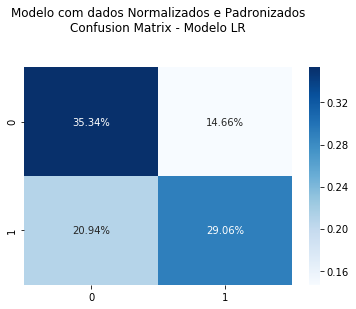

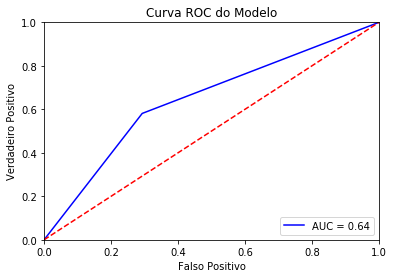



Modelo: LR => 64.40% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados
Confusion Matrix - Modelo LDA


[[26316 10974]
 [15924 21366]]




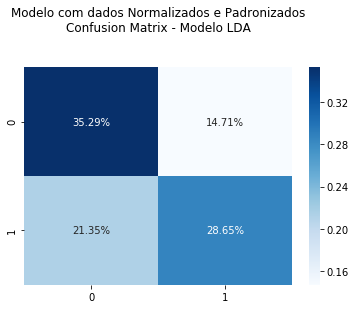

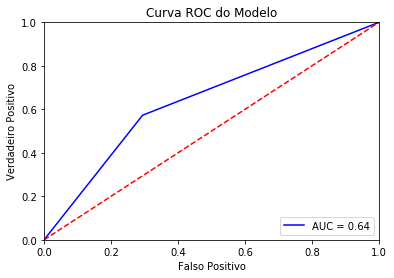



Modelo: LDA => 63.93% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados
Confusion Matrix - Modelo XGB


[[28878  8412]
 [ 2167 35123]]




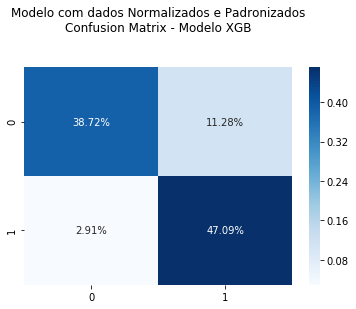

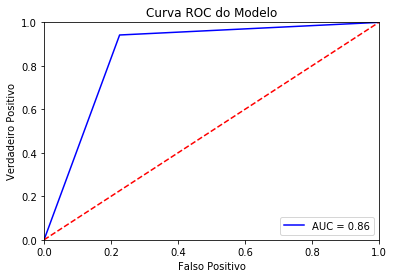



Modelo: XGB => 85.82% (Acuraria) - Modelo com dados Normalizados e Padronizados






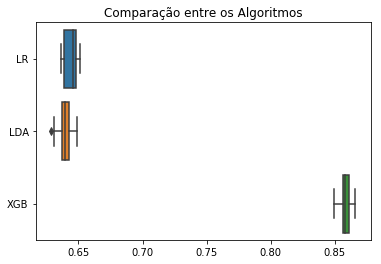

In [280]:
resultados = executar(X, Y, 'Modelo com dados Normalizados e Padronizados')

In [274]:
# Modelos com os dados comuns, sem tratamento

In [ ]:
resultados1 = executar(X_comum, Y_comum, 'Modelo com dados sem tratamento')

## Modelo Escolhido => XGBClassifier - Modo Normalizado e Padronizado

### Otimizando o Modelo para aumentar a acurácia. 

In [313]:
# Utilizando RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import randint

modelo_inicial = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(500, 1500),
              'learning_rate': stats.uniform(0.05, 0.20),
              'subsample': stats.uniform(0.1, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 10
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

rsearch = RandomizedSearchCV(modelo_inicial, 
                         param_distributions = param_dist,
                         cv = kfold,  
                         n_iter = 5,
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.2f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 24.7min finished


Acurácia: 91.14
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.11660371295014214, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=735, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6020533055981342, verbosity=1)


In [314]:
#Gerando dados de Treino e de Teste para os modelos - 70% para o treino, 30% para Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.30)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((52206, 10), (22374, 10), (52206,), (22374,))

### Gerando o modelo final com a otimização

Modelo: XGB Final => 86.51% (Acuraria) - Modelo Otimizado

 Tabela - Confusion Matrix - Modelo XGB Final 


[[29002  8288]
 [ 1771 35519]]




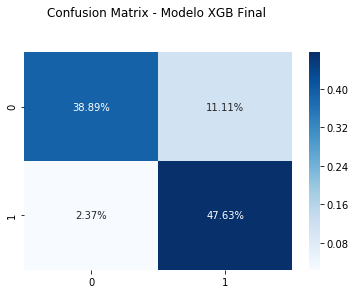

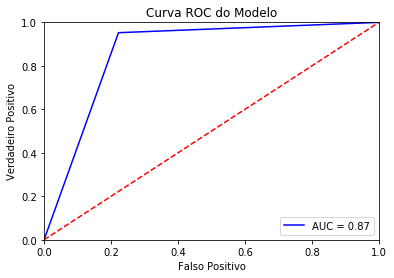

In [315]:
# Criando o modelo
modelo_xgb_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.11660371295014214, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=735, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6020533055981342, verbosity=1)

kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
cv_results = cross_val_predict(modelo_xgb_final, X, Y, cv = kfold)
cv_results_score = cross_val_score(modelo_xgb_final, X, Y, cv = kfold, scoring = 'accuracy')
print("Modelo: %s => %.2f%s (Acuraria) - %s" % ('XGB Final', cv_results_score.mean() * 100, '%', 'Modelo Otimizado'))

#Confusion Matrix
montarMatrixConfusion(Y, cv_results, "Confusion Matrix - Modelo XGB Final \n\n")


### Otimização manual, baseada em minha experiência 

In [333]:
modelo_xgb_final1 = XGBClassifier(base_score=0.7, booster='gbtree', learning_rate=0.11, n_estimators=750)

# Treinando o model
modelo_xgb_final1.fit(X_treino, y_treino)
# Fazendo previsões
y_pred_xgb = modelo_xgb_final1.predict(X_teste)
previsoes_xgb = [round(value) for value in y_pred_xgb]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes_xgb)
print("Acurácia XGB Final - Otimização Manual: %.2f%%" % (accuracy * 100.0))



Acurácia XGB Final - Otimização Manual: 86.81%


In [335]:
# Salvando o modelo
joblib.dump(modelo_xgb_final1, 'modelo/modelo_xgb_final.joblib')
print("Modelo salvo!")

Modelo salvo!


### Previsões

Temos 10 casos reais num dataset separado para estimular e prever o Churn
O Objetivo desse trecho é demonstrar o algoritmo funcionando e mostrando os resultados de Churn Sim ou Não e a probabilidade disso. Conforme objetivos específicos desse TCC. 

In [337]:
#Load do modelo - Churn
modelo_churn = joblib.load('modelo/modelo_xgb_final.joblib')
modelo_churn

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.11, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [339]:
#Carregando o dataset - Predicao
df = pd.read_csv('dados/dataset_previsao.csv', sep=",")
df.head(10)

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,numeroSegmentoCliente,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,...,I_ESCOLARIDADE,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,gerouSinistro
0,3,2,0,1,0,1,10,4,8,1,...,647.000,1300.18,0,2,2,2,2,76.61,2,0
1,5,2,0,1,0,1,23,5,2,1,...,365.000,6506.66,0,2,3,3,3,171.14,3,0
2,4,5,1,1,1,1,22,5,8,1,...,365.000,2120.00,1,2,3,3,1,-677.50,1,0
3,3,5,1,1,0,1,10,4,8,1,...,251.000,1643.34,1,2,2,2,2,-151.24,1,0
4,2,2,0,1,0,1,10,5,8,1,...,629.000,1217.53,0,2,2,2,2,-7.94,2,0
5,4,2,0,1,0,1,10,5,8,1,...,647.000,620.29,0,3,1,1,1,-123.64,1,0
6,0,2,0,1,0,1,10,4,2,1,...,0.487,897.45,0,3,1,3,2,-25.02,2,0
7,12,2,1,1,1,1,10,5,8,1,...,273.000,846.21,1,2,1,2,2,-47.01,2,0
8,2,1,1,1,0,1,10,3,8,1,...,326.000,833.20,0,2,1,2,1,-95.13,2,0
9,4,2,1,1,0,1,10,5,8,1,...,419.000,881.31,1,2,1,1,1,23.19,2,0


In [ ]:
# Tratamento de Dados - Pré-Processamento do Modelo
df = df.drop(['valorDiferencaPremioAnual',
 'IDHM_E',
 'IDHM_L',
 'I_ESCOLARIDADE',
 'gerouSinistro',
'numeroSegmentoCliente',
'tipoPessoaSegurado',
'estacaoAno'], axis=1)

In [344]:
#Pegando as colunas no Features Selection
mask = fs.get_support()
colunas = df.columns
new_features = [] 
for bool, feature in zip(mask, colunas):
    if bool:
        new_features.append(feature)
        
df_selection = pd.DataFrame(df, columns=new_features)

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(df_selection.values)

#Gerando padronização dos valores
scalerP = StandardScaler().fit(rescaledX)
standardX = scalerP.transform(rescaledX)

standardX


array([[-0.3,  0.2, -0.3, -0.4, -0.2,  0.7, -1.2,  1.2, -0.2,  0.7],
       [ 0.4, -0.8,  2.8,  3. ,  3. ,  0.2,  0.9, -1. ,  2.9,  1.2],
       [ 0. , -1.9,  0.6, -0.1, -0.5, -1.3,  0.9, -1. ,  0.3, -2.7],
       [-0.3,  1.5,  0. , -0.2, -0. ,  0.7,  0.5,  0.6, -0. , -0.3],
       [-0.6,  1.4, -0.3, -0.4, -0.3, -1.8, -1.2,  1.2, -0.3,  0.4],
       [ 0. ,  0.3, -0.6, -0.5, -0.5, -1.3, -1.2,  1.2, -0.6, -0.2],
       [-1.3, -0.1, -0.5, -0.1, -0.3,  0.7, -1.2, -1. , -0.5,  0.3],
       [ 2.7, -0.9, -0.5, -0.4, -0.4,  0.7,  0.6, -1. , -0.5,  0.2],
       [-0.6, -0.3, -0.5, -0.4, -0.4,  0.7,  0.8,  0.7, -0.5, -0. ],
       [ 0. ,  0.8, -0.6, -0.5, -0.4,  0.7,  1.2, -1. , -0.5,  0.5]])

In [346]:
# Previsões
Y_churn_prob = modelo_churn.predict_proba(standardX)
Y_churn = modelo_churn.predict(standardX)


In [347]:
Y_churn_prob

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.9, 0.1]], dtype=float32)

In [348]:
Y_churn

array([0., 0., 0., 1., 0., 1., 1., 1., 1., 0.])

In [349]:
df_resultado = df_selection
df_resultado['Churn'] = Y_churn
df_resultado['Probabilidade_NoChurn'] = (Y_churn_prob[:,0] * 100)
df_resultado['Probabilidade_Churn'] = (Y_churn_prob[:,1] * 100)

df_resultado['Churn'] = ['Sim' if x == 1.0 else  'Nao' for x in df_resultado['Churn'] ]


In [358]:
df_resultado[['Churn','Probabilidade_NoChurn','Probabilidade_Churn']].head(10)

,Churn,Probabilidade_NoChurn,Probabilidade_Churn
0,Nao,84.344780,15.655220
1,Nao,56.296696,43.703304
2,Nao,69.229301,30.770700
3,Sim,24.623167,75.376831
4,Nao,64.573311,35.426693
5,Sim,43.987423,56.012577
6,Sim,37.799049,62.200951
7,Sim,15.165210,84.834793
8,Sim,18.243187,81.756813
9,Nao,85.166435,14.833565


In [359]:
#Salvando o trabalho
df_resultado[['Churn','Probabilidade_NoChurn','Probabilidade_Churn']].to_excel('resultado/resultado.xlsx', header=True, index=False, engine='openpyxl')

## FIM
## OBRIGADO